# Assignment 1

## fifa19 players dataset

In [647]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv", index_col=0)

In [648]:
pd.set_option('display.max_columns', None)

In [649]:
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813

# Cleanup
The dataset has some information that either cannot be analyzed or needs to be changed<br><br>
### Removed
+ Photo
+ Flag
+ Club Logo

### Changed
+ Value
+ Wage
+ Release Clause
+ Preferred Foot
+ Height
+ Weight


## Changes
### Value, Wage, Release Clause
Each value of column **Value**, **Wage**, **Release Clause**, `x = df.loc[:,['Value|Wage|Release Clause']]` has format: *€x[M,K]*.<br>
The character **€** is removed and depending on **M** or **K** the value is changed.<br>
Ex: €110.5M -> 110500000 | €260K -> 260000<br>

In [650]:
## Applying the changes for Value, Wage and Release Clause

arr = ['Value','Wage', 'Release Clause']
for x in arr:
    df[x] = df[x].str.strip('€')
    df[x] = df[x].str.translate(str.maketrans({'.':'','K':'000','M':'000000'}))
    df[x] = df[x].fillna("0")
    df[x] = pd.to_numeric(df[x])



### Preferred Foot
The values Right and left, and null are changed to 0, 1, and 2<br>
Right -> 0 <br>
Left -> 1 <br>
null -> 2

In [651]:
## Right -> 0, Left -> 1
df['Preferred Foot'] = df['Preferred Foot'].str.replace("Right","0")
df['Preferred Foot'] = df['Preferred Foot'].str.replace("Left","1")
## Changing null values to 2
df['Preferred Foot'] = df['Preferred Foot'].fillna("2")
df['Preferred Foot'] = pd.to_numeric(df['Preferred Foot'])

### Height
The height is transformed to a readable numerical value
5'11 -> 5.11<br>
Null value changed with the average value ~5.8

In [652]:
df['Height'] = df['Height'].str.translate(str.maketrans({"'":"."}))
df['Height'] = pd.to_numeric(df['Height'])
df['Height'] = df['Height'].fillna(df.Height.mean())

In [653]:
df['Height'].describe()

count    18207.000000
mean         5.797367
std          0.447641
min          5.100000
25%          5.110000
50%          5.900000
75%          6.100000
max          6.900000
Name: Height, dtype: float64

## Weight
The characters **lbs** are removed
158lbs -> 158

In [654]:
df['Weight'] = ((df['Weight'].str.strip('lbs')))
df['Weight'] = pd.to_numeric(df['Weight'])
df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

## Photo, Flag, Club Logo

In [655]:
df = df.drop(columns=['Photo', 'Flag', 'Club Logo'])

# Average age of the players
The method `describe()` can be used in this case. More specifically, invoking `mean()` on the the dataframe column **Age** returns the average age of the players: **25.122206**

In [656]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,1.820700e+04
mean,214298.338606,25.122206,66.238699,71.307299,1.362983e+07,9731.312133,1597.809908,0.236557,1.113222,2.947299,2.361308,19.546096,5.797367,165.979129,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,3.620049e+07
std,29965.244204,4.669943,6.908930,6.136496,3.987587e+07,21999.290406,272.586016,0.431139,0.394031,0.660456,0.756164,15.947765,0.447641,15.593344,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,1.033686e+08
min,16.000000,16.000000,46.000000,48.000000,0.000000e+00,0.000000,731.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.100000,110.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,200315.500000,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1457.000000,0.000000,1.000000,3.000000,2.000000,8.000000,5.110000,154.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,3.920000e+05
50%,221759.000000,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1635.000000,0.000000,1.000000,3.000000,2.000000,17.000000,5.900000,165.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.000000e+06
75%,236529.500000,28.000000,71.000000,75.000000,1.300000e+07,9000.000000,1787.000000,0.000000,1.000000,3.000000,3.000000,26.000000,6.100000,176.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,6

In [657]:
df.Age.mean()

25.122205745043114

## Name of the oldest player
The **name** of the oldest player can be found with the method `loc()` by leveraging the output from of `max()` with a conditional statement. The Name is return with by specifying the **Name** column: **O. Pérez**

In [658]:
## Finding the name of the oldest player with conditional statement
## The max value for df.Age.max() is 45
(df.loc[df['Age'] == df.Age.max()])['Name']

4741    O. Pérez
Name: Name, dtype: object

##  The highest salary
The **Wage** column holds the data needed for finding the player's salary. Analyzing the data type of the different columns with the method `info()`, shows that **Wage** is interpreted as an *object*. <br>
The method `head()` shows that the characters **€** and **K** prevent the column data from being interpreted as a numerical value.<br>
The method `strip()` is used to remove the characters **€** and **K**, and the method `astype()` is used to cast the output to *integer*.<br>
The methods `describe()` and `max()` are ultimately used to find the highest salary: **€565K**

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  int64  
 8   Wage                      18207 non-null  int64  
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18207 non-null  int64  
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

In [660]:
## Removing the characters with strip() and casting the output to int with astype()
## The highest salary is found with describe()
df['Wage'].describe()

count     18207.000000
mean       9731.312133
std       21999.290406
min           0.000000
25%        1000.000000
50%        3000.000000
75%        9000.000000
max      565000.000000
Name: Wage, dtype: float64

In [661]:
## The max value can also be found with max()
df['Wage'].max()

565000

# Histogram
Few things can be noticed from the histograms.


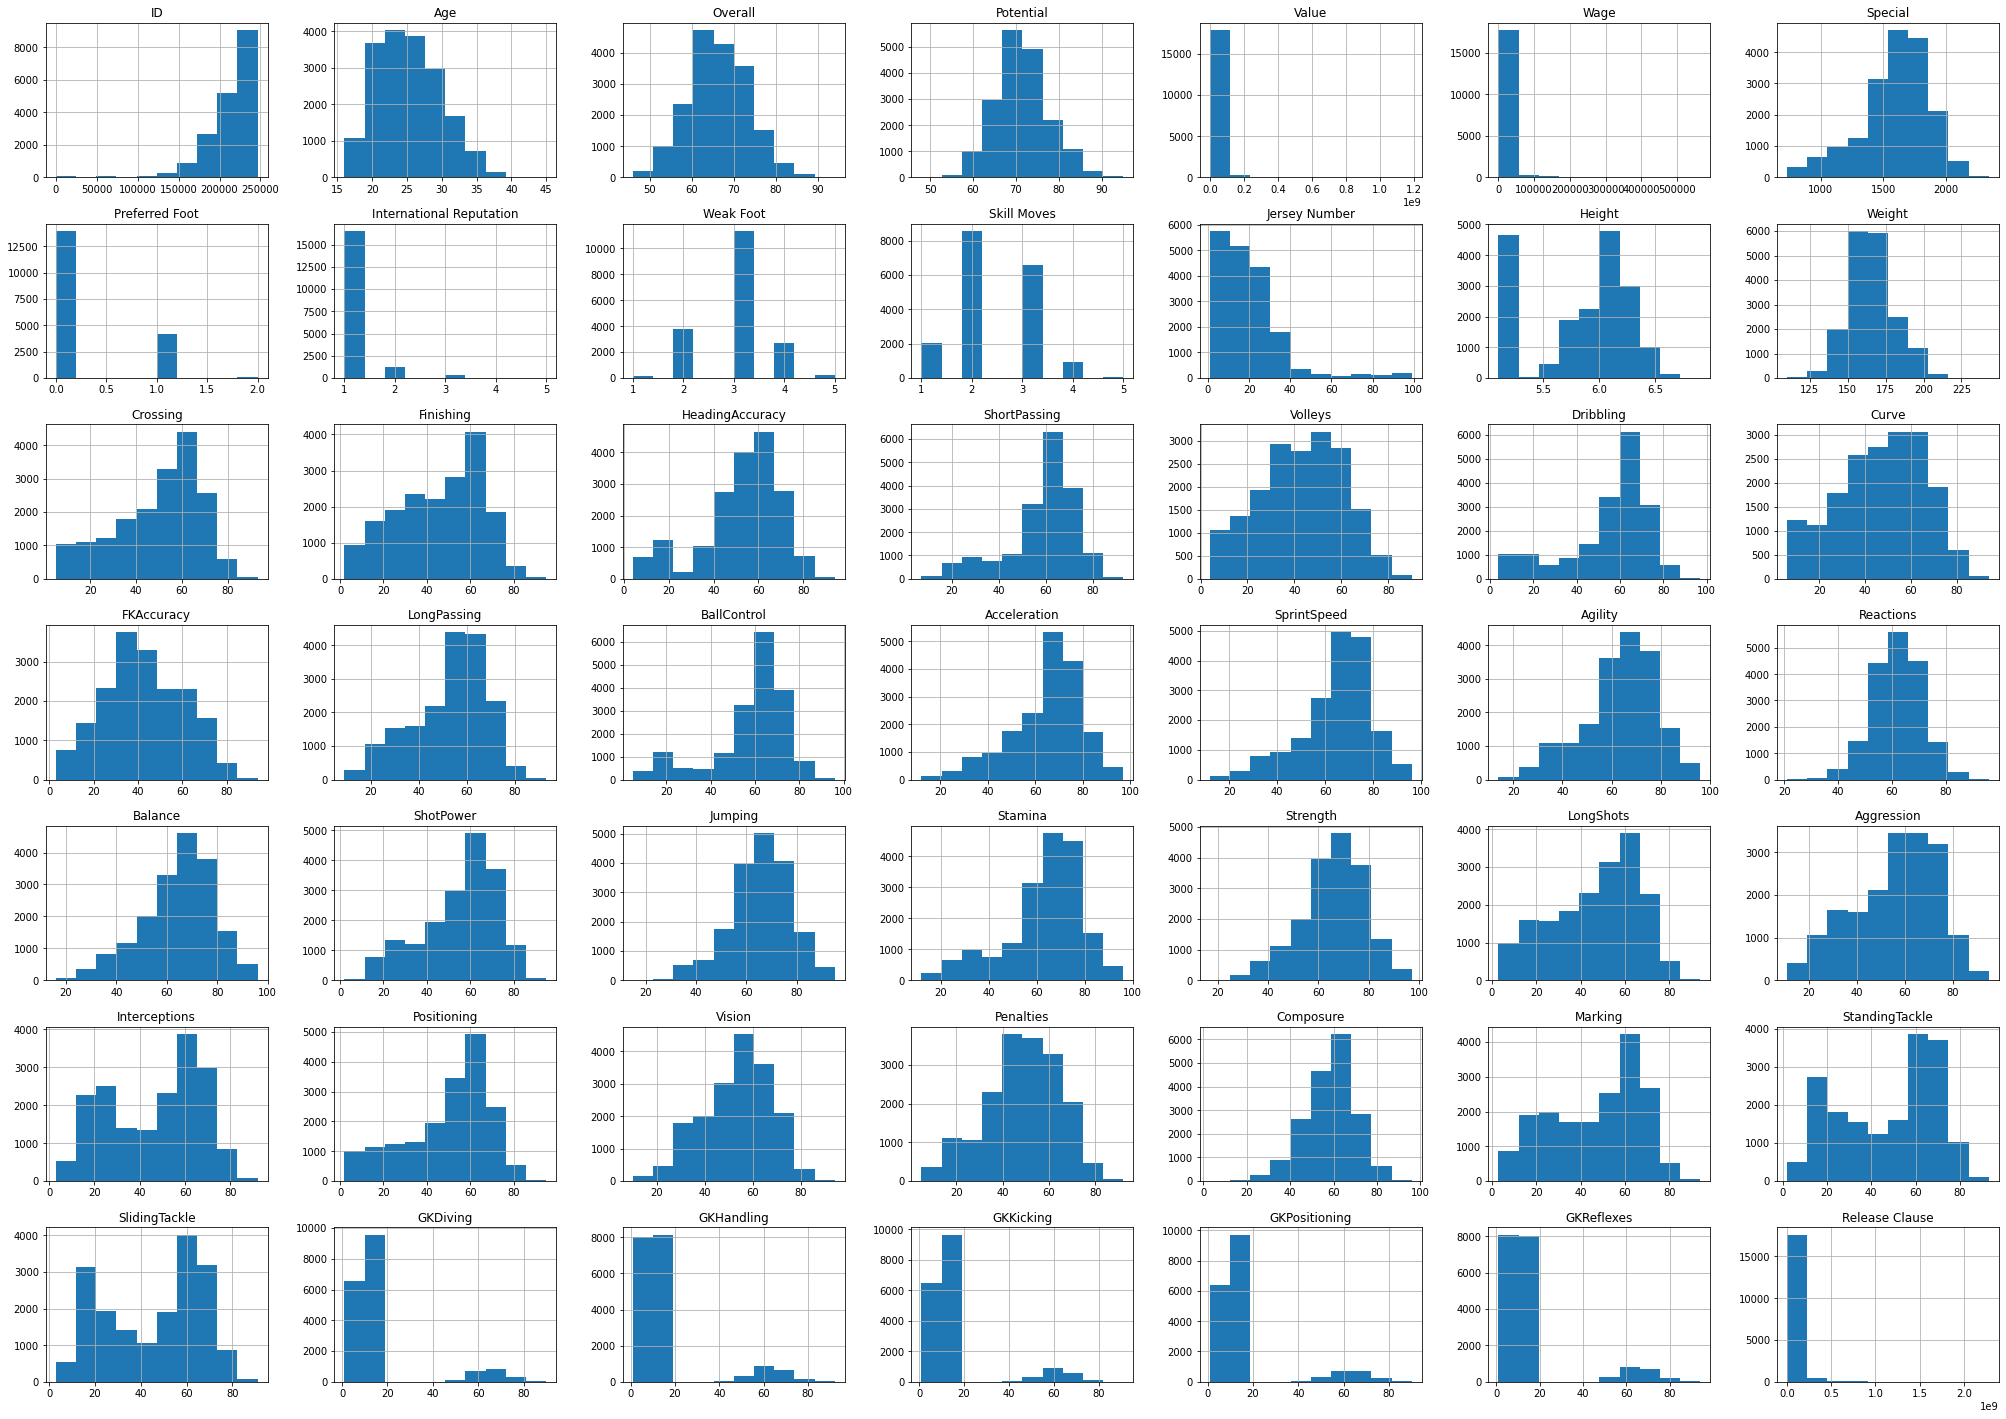

In [662]:
df.hist(figsize=(35,25));

## Age
The Age histogram is skewed to the left, indicating most of the players are between 20 and 30 years old

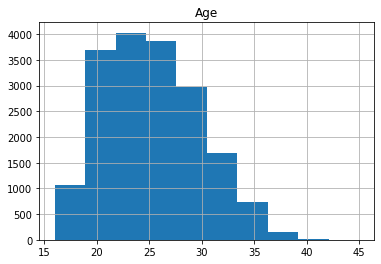

In [663]:
df.hist(column=["Age"]);

## Preferred Foot
Most of the players prefer the Right foot

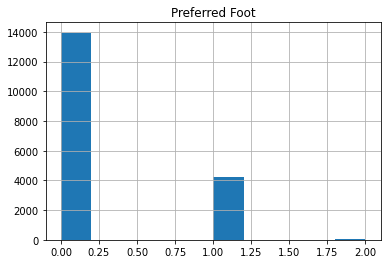

In [664]:
df.hist(column=["Preferred Foot"]);

## Acceleration, SprintSpeed, Agility
These three histograms present a similar distribution. Normally these three skills are related.

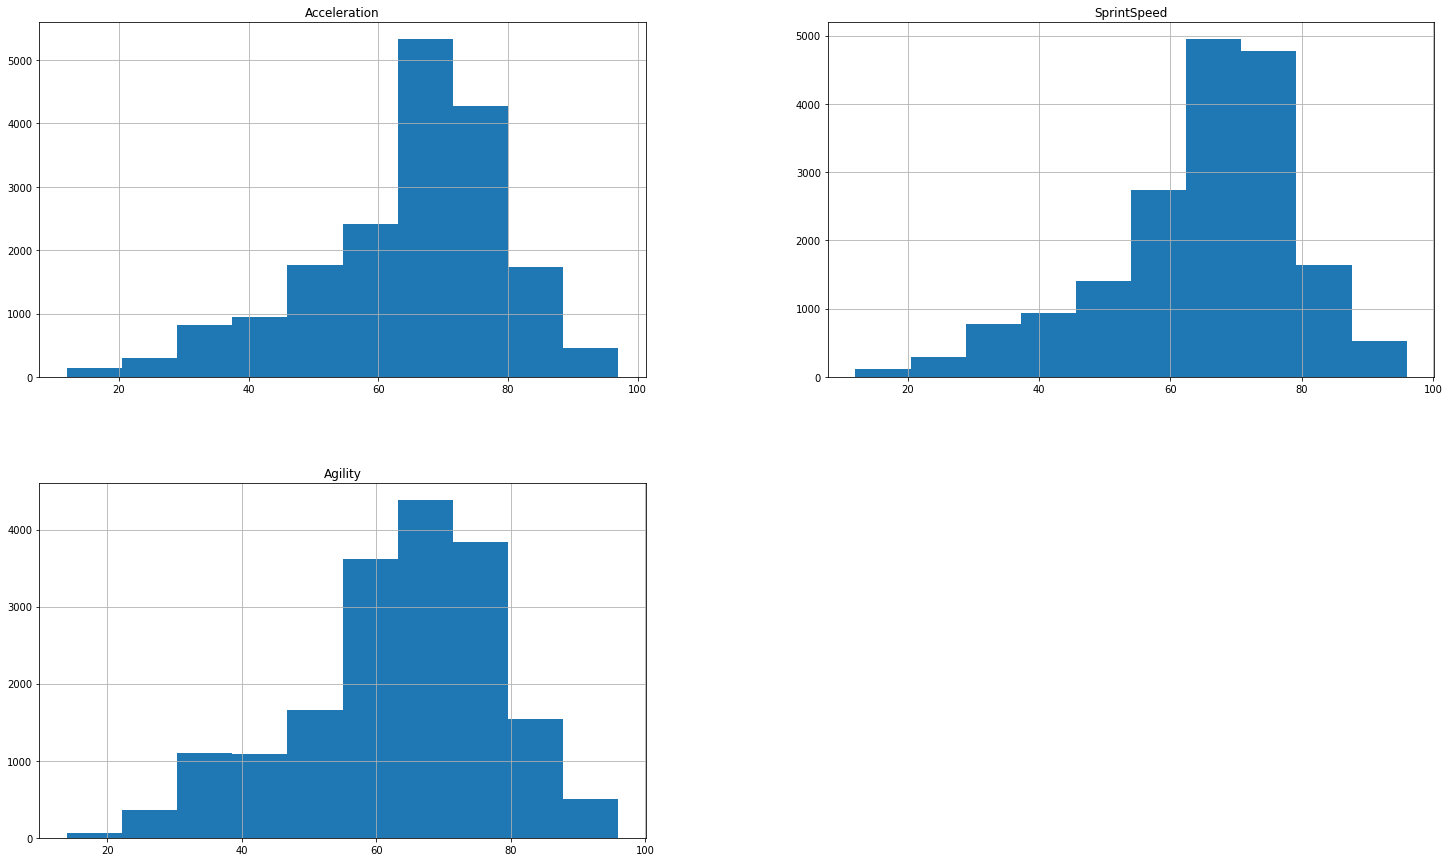

In [665]:
df.hist(column=["Acceleration", "SprintSpeed", "Agility"], figsize=(25,15));

## Ball Control and Dribbling
The distribution and the outliers are very similar. The similar outliers highlights how ball control and dribbling skills are related. 

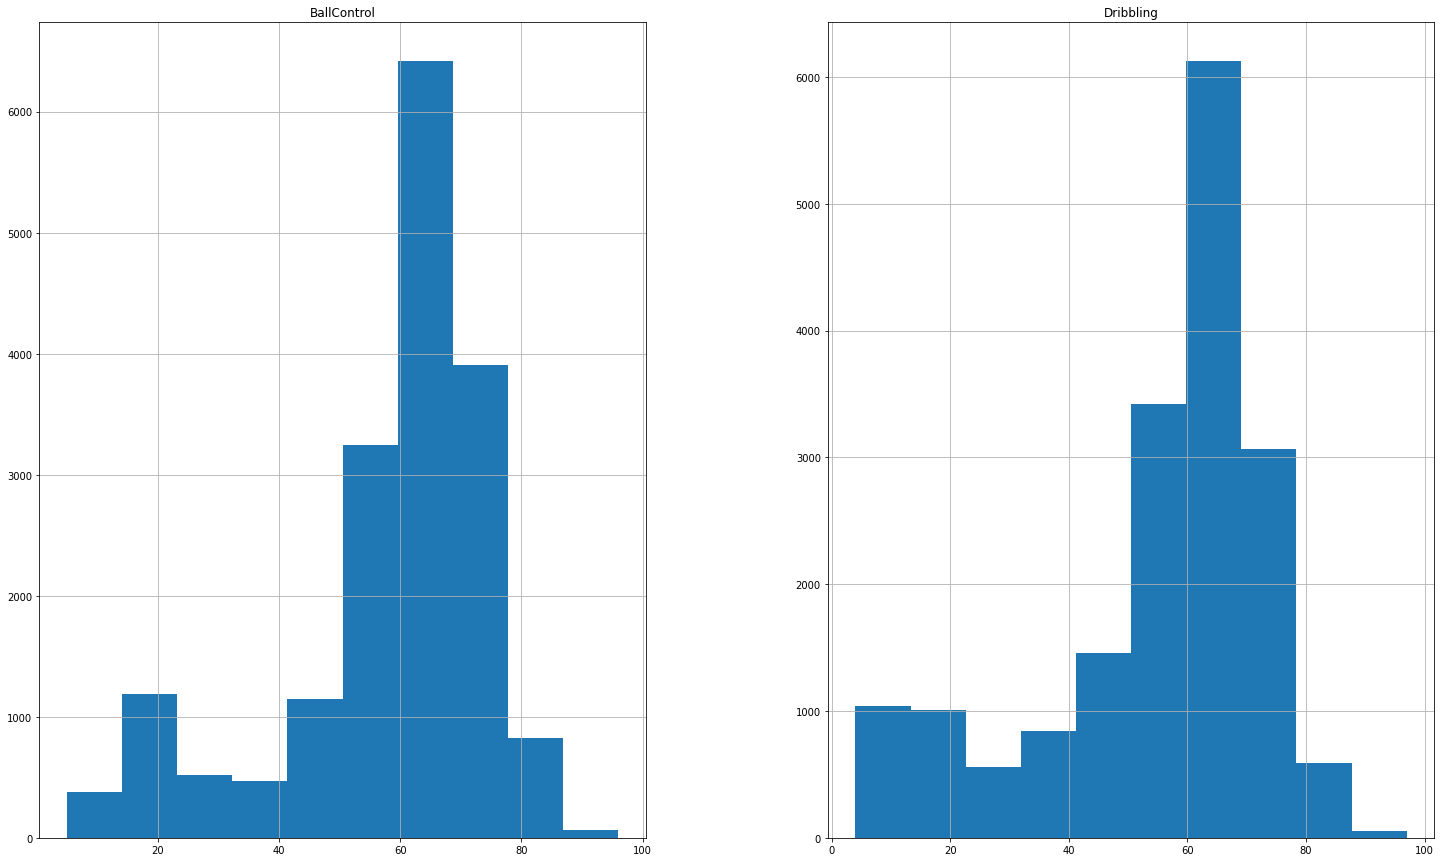

In [666]:
df.hist(column=["BallControl", "Dribbling"], figsize=(25,15));

# Correlation

In [667]:
df_corr = df.corr()
df_corr

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,1.000000,-0.739208,-0.417025,0.047074,-0.106880,-0.204610,-0.231352,0.003771,-0.356191,-0.075784,-0.056914,0.182074,-0.054103,-0.191425,-0.131994,-0.082323,-0.106815,-0.136279,-0.159915,-0.030340,-0.169511,-0.199549,-0.186764,-0.100184,0.133236,0.132437,-0.019897,-0.408617,0.048463,-0.166133,-0.169369,-0.053895,-0.259756,-0.161549,-0.228329,-0.160602,-0.088330,-0.215170,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778,-0.114893
Age,-0.739208,1.000000,0.452350,-0.253312,0.058848,0.141145,0.236695,-0.002846,0.253765,0.059867,0.027649,-0.241156,0.053174,0.230213,0.130545,0.068660,0.147183,0.132894,0.142472,0.010166,0.143276,0.193467,0.181310,0.084969,-0.158667,-0.151682,-0.019395,0.453124,-0.089877,0.156947,0.177167,0.097793,0.332798,0.155096,0.265190,0.197845,0.082443,0.187422,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313,0.057294
Overall,-0.417025,0.452350,1.000000,0.660939,0.499790,0.571926,0.606960,0.036196,0.499491,0.212015,0.414463,-0.218931,0.040774,0.154634,0.394972,0.332515,0.340776,0.502550,0.391338,0.372426,0.419491,0.396892,0.483909,0.460197,0.196869,0.210647,0.264952,0.850045,0.103160,0.441118,0.264435,0.365656,0.349326,0.420795,0.395470,0.321326,0.356493,0.498894,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276,0.562588
Potential,0.047074,-0.253312,0.660939,1.000000,0.457905,0.486413,0.383727,0.028867,0.372993,0.162346,0.354290,-0.010474,0.013914,-0.006947,0.246319,0.243355,0.200988,0.369189,0.254906,0.315019,0.279944,0.230544,0.321437,0.354396,0.234608,0.236771,0.222310,0.513425,0.138025,0.288318,0.109151,0.202563,0.075769,0.266740,0.171174,0.154908,0.245616,0.348141,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341,0.525832
Value,-0.106880,0.058848,0.499790,0.457905,1.000000,0.623611,0.310190,0.009475,0.454649,0.134772,0.264022,-0.075694,0.008694,0.033088,0.211863,0.209650,0.152528,0.271076,0.235255,0.228060,0.241345,0.221563,0.252284,0.257700,0.142778,0.143827,0.161905,0.431399,0.095574,0.234275,0.083713,0.175257,0.098425,0.235310,0.149122,0.118884,0.214564,0.291482,0.194791,0.366372,0.113887,0.094844,0.077349,-0.033054,-0.031571,-0.031964,-0.031807,-0.033406,0.694382
Wage,-0.204610,0.141145,0.571926,0.486413,0.623611,1.000000,0.347835,0.010576,0.668635,0.140849,0.263205,-0.086561,0.023286,0.064776,0.232834,0.217439,0.187967,0.296691,0.257357,0.237150,0.259550,0.236385,0.276762,0.277615,0.124985,0.130315,0.156287,0.495560,0.088873,0.258351,0.129691,0.177562,0.139360,0.249084,0.194581,0.157415,0.226775,0.315395,0.222440,0.419597,0.145594,0.126291,0.111025,-0.025595,-0.025177,-0.028325,-0.025489,-0.025992,0.787085
Special,-0.231352,0.236695,0.606960,0.383727,0.310190,0.347835,1.000000,0.122518,0.292208,0.341855,0.763412,-0.133716,-0.295836,-0.267830,0.866417,0.724244,0.644421,0.906729,0.773974,0.874274,0.851900,0.806414,0.846302,0.912107,0.654337,0.645963,0.699673,0.597169,0.586788,0.835277,0.321846,0.792762,0.192990,0.840049,0.666236,0.561676,0.824307,0.761992,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238,0.332148
Preferred Foot,0.003771,-0.002846,0.036196,0.028867,0.009475,0.010576,0.122518,1.000000,-0.001914,-0.072325,0.109496,-0.018032,-0.043386,-0.073749,0.207002,0.041634,0.043197,0.102362,0.052706,0.132130,0.160309,0.150728,0.108396,0.116102,0.119571,0.118210,0.109280,0.026705

## Positive Correlations
**Ball Control** has different positive correlations. Some of the highest are **Dribbling**, **ShortPassing**, and **Crossing** which makes sense as these three skills are heavily based on ball control.<br>
**Volleys** has positive correlations with **Finishing**, **Positioning**, and **Longshots**. These correlations make sense as mostly volleys in football occur when trying score; they require good positions as the ball might come fast; in order to make good longshots for scoring it's better to take advantage of the momentum of the ball.
## Negative Correlations
**Balance** has negative correlations with **Weight** and  **Strength**. The correlation with **Weight** doesn't really make sense as is commonly associated with balance. Strength does make sense: a player can have a lot of strength but still no balance or a lot of strength and a lot of balance. It doesn't matter. 

## Inputs and Target
I would use **LongShots**, **Positioning**, **Dribbling**, **Volley** as inputs and **Finishing** as target.
These inputs and target are all highly correlated. The sets of these ability as can help determine the ability of scoring.

# Heatmap

<AxesSubplot:>

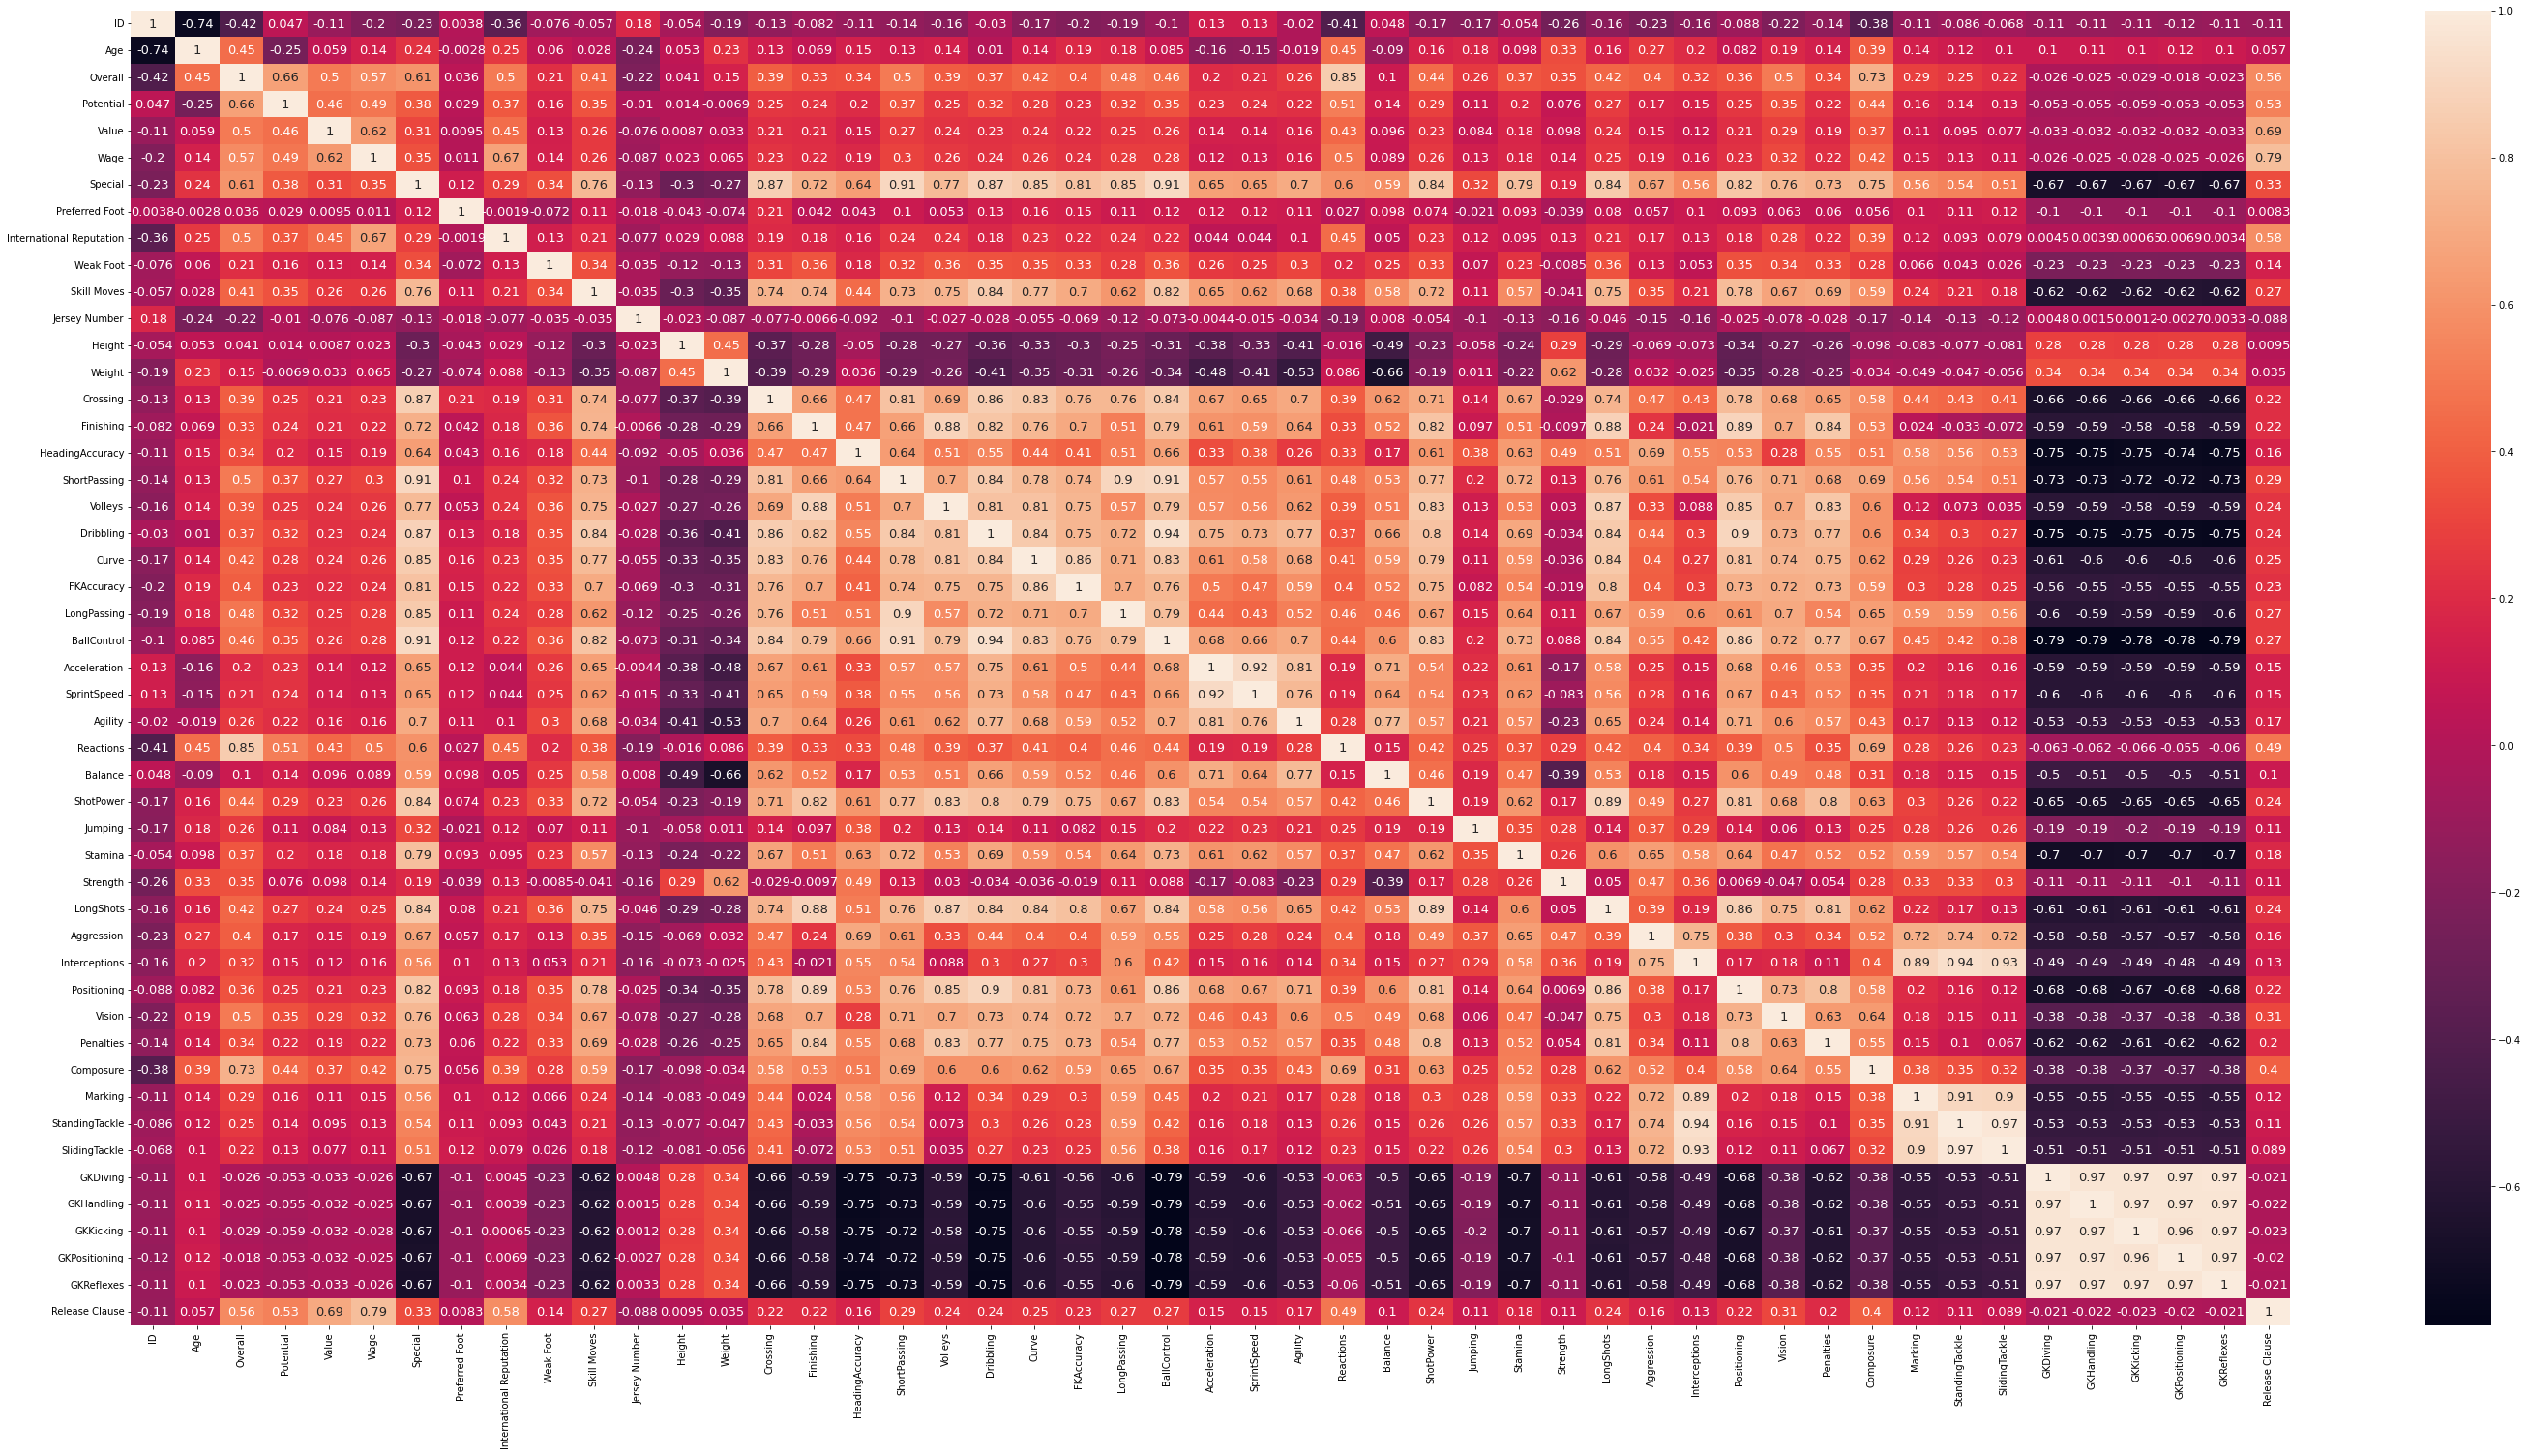

In [673]:
plt.figure(figsize=(50, 25))
sns.heatmap(df_corr, annot=True, annot_kws={'size':13})

# Visualizations

## SprintSpeed and Acceleration
These two columns present a strong linear relationship as SprintSpeed and Acceleration usually are correlated.

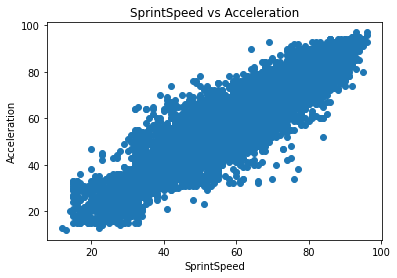

In [672]:
plt.scatter(x=df.SprintSpeed, y=df.Acceleration)
plt.xlabel('SprintSpeed')
plt.ylabel('Acceleration')
plt.title('SprintSpeed vs Acceleration')
plt.show()

## Volleys and LongShots
These two columns present a strong linear relationship as the ability of executing longshots and volleys is correlated.

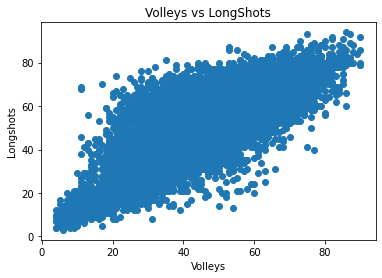

In [675]:
plt.scatter(x=df.Volleys, y=df.LongShots)
plt.xlabel('Volleys')
plt.ylabel('Longshots')
plt.title('Volleys vs LongShots')
plt.show()